<a href="https://colab.research.google.com/github/pks98/Pracfiles/blob/main/StandardScaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('Social_Network_Ads.csv')

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.shape


(400, 5)

In [7]:
df.drop(['User ID'],axis=1,inplace=True)

In [8]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])

In [11]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [14]:
df['Gender'].value_counts()

0    204
1    196
Name: Gender, dtype: int64

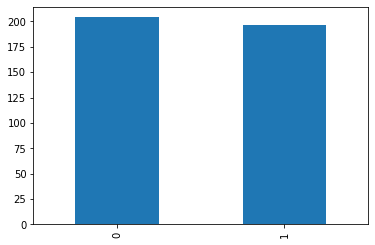

In [13]:
df['Gender'].value_counts().plot(kind='bar')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


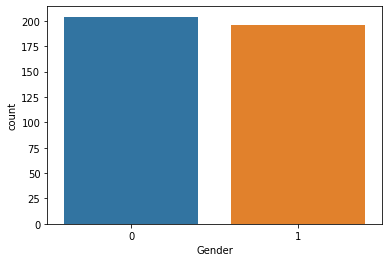

In [15]:
import seaborn as sns
sns.countplot(df['Gender'])

In [24]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


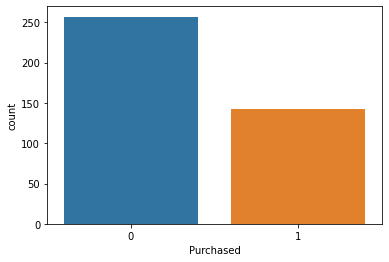

In [23]:
sns.countplot(df['Purchased'])

Splitting the data into dependent and independent variable

In [16]:
x=df.drop('Purchased',axis=1)
y=df['Purchased']

In [18]:
x.head()

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000


In [19]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

Splitting the data into train and test set

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [49]:
x_train.drop('Gender',axis=1,inplace=True)

In [53]:
x_test.drop('Gender',axis=1,inplace=True)

In [29]:
x_train.shape,x_test.shape

((320, 3), (80, 3))

Scaling the data

In [33]:
from sklearn.preprocessing import StandardScaler
se=StandardScaler()

In [34]:
x_train_scaled=se.fit_transform(x_train)
x_test_scaled=se.transform(x_test)

In [41]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=['Gender','Age','Salary'])
x_train_scaled.drop('Gender',axis=1,inplace=True)

In [42]:
x_train_scaled

,Age,Salary
0,-0.803301,-1.191218
1,0.756980,-1.368598
2,0.854498,1.439920
3,-0.510748,-1.486851
4,-1.485924,0.375639
...,...,...
315,1.439603,0.641709
316,-1.680959,-1.339035
317,1.342085,-1.339035
318,0.854498,0.316513


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


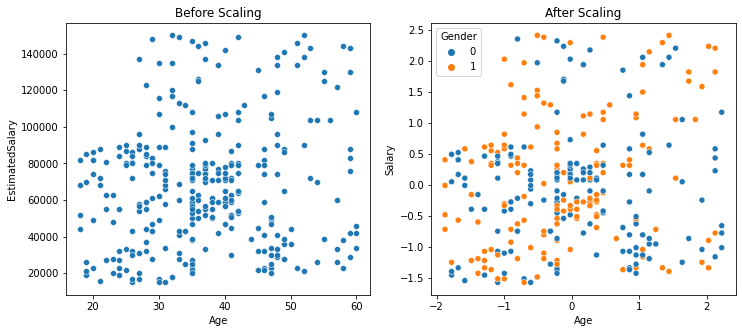

In [46]:
import matplotlib.pyplot as plt
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12, 5))
ax1.set_title("Before Scaling")
sns.scatterplot(x_train['Age'],x_train['EstimatedSalary'],ax=ax1)
ax2.set_title("After Scaling")
sns.scatterplot(x_train_scaled['Age'],x_train_scaled['Salary'],ax=ax2,hue=df['Gender'])

As we can see the scatterplot looks the same even after scaling the data.The only difference is the scales have been changed

In [50]:
x_train.describe()

,Age,EstimatedSalary
count,320.000000,320.000000
mean,37.237500,68293.750000
std,10.270625,33878.650655
min,18.000000,15000.000000
25%,29.000000,43000.000000
50%,37.000000,65000.000000
75%,45.000000,85250.000000
max,60.000000,150000.000000


As we can the mean and std of the age column in **37.23** and **10.27** respectively before scaling the data.
And mean and std of the Salary column in **68293.75** and **33878.65** respectively before scaling the data.


In [52]:
import numpy as np
np.round(x_train_scaled.describe(),2)

,Age,Salary
count,320.00,320.00
mean,0.00,-0.00
std,1.00,1.00
min,-1.88,-1.58
25%,-0.80,-0.75
50%,-0.02,-0.10
75%,0.76,0.50
max,2.22,2.42


After scaling the data of both the columns the mean and std is changed to **0** and **1** respectively

# Model building

In [54]:
from sklearn.linear_model import LogisticRegression

Model building without scailing the data

In [60]:
model_noscale=LogisticRegression()
model_noscale.fit(x_train,y_train)

LogisticRegression()

In [75]:
model_scale=LogisticRegression()
model_scale.fit(x_train_scaled,y_train)

LogisticRegression()

In [71]:
x_test_scaled=pd.DataFrame(x_test_scaled,columns=['Gender','Age','Salary'])
x_test_scaled.drop('Gender',axis=1,inplace=True)

In [82]:
pred=model_noscale.predict(x_test)


In [77]:
pred1=model_scale.predict(x_test_scaled)


Finding the accuracy of the model built with unscaled data

In [58]:
from sklearn.metrics import accuracy_score

In [83]:
print('Accuracy of the model before scaling the data: ',accuracy_score(y_test,pred))
print('Accuracy of the model after scaling the data: ',accuracy_score(y_test,pred1))


Accuracy of the model before scaling the data:  0.6
Accuracy of the model after scaling the data:  0.8375


# Thus Scaling plays an important role in improving the accuracy of the model